# 第4回課題

## 課題1
テキスト用のセルでコメントを書く

コメントコメントコメント

感想感想感想

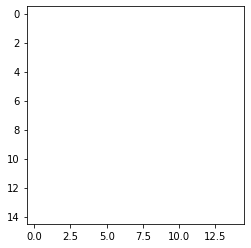

....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


In [2]:
# Homework
%matplotlib inline
import unittest
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import copy



#Q1
def lucky_array(n):
    a = [False for i in range(n)] # 初めに全てが False の配列を作成 
    for i in range(1, n):
        # iが7の倍数なら a[i] = True
        if i % 7 == 0:
             a[i] = True
        # 各桁の和が 7 の倍数である
        elif digit_sum(i) == 7:
            a[i] = True
    return a


def digit_sum(n):
    digit_num = math.floor(math.log10(n))+1
    
    if digit_num < 2:
        return int(n)
    
    sum = 0 
    for i in range(digit_num):#012 -> 210
        digit = int(n / 10 ** (digit_num-i-1))
        
        sum += digit
        n = n - (digit * 10 ** (digit_num-i-1))
    return sum

#Q2
def prime_array(n):
    a = [True for i in range(n+1)]
    rs = []
    for i in range(0, n+1):
        if i == 0 or i == 1:
            a[i] = False
        elif a[i]:
            rs.append(i)
            j = 2
            while j*i < n+1:
                a[j*i] = False
                j = j + 1
                
    return rs

#Q3
def extend_sum(a):
    el = [0 for i in range(len(a[0])+1)]
    len_el = len(el)
    a.append(el)
    
    for i in range(len(a)-1):
        a[i].append(0)
        for j in range(len_el-1):
            a[i][len_el-1] = a[i][len_el-1] + a[i][j]
            a[len(a)-1][j] = a[len(a)-1][j] + a[i][j]
            a[len(a)-1][len_el-1] = a[len(a)-1][len_el-1] + a[i][j]
    return a  

#Q4

def make_field(h, w, l):
    a = [[False for i in range(w)] for j in range(h)]
    if len(l) > 0:
        for i in l:
            a[i[0]][i[1]] = True
    return a

def plot(array2d):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    im = ax.imshow(array2d, interpolation="nearest", cmap="Greys")
    fig.show() # fig.savefig("plot.pdf")
    
# a = make_field(5, 5, [[0,1], [1,2], [2,0], [2,1], [2,2]])
# plot(a)

def inside(field, r, c):
    if r >= len(field) or c >= len(field[0]) or r < 0 or c < 0:
        return False
    else:
        return True
        
def is_living_cell(field, r, c):
    if inside(field, r, c):
        return field[r][c]
    else:
        return False
    
# print(inside(make_field(1,2,[]), 0,0))
# print(inside(make_field(1,2,[]), 0,1))
# print(inside(make_field(1,2,[]), 0,2))
# print(inside(make_field(1,2,[]), 0,-1))

def count(field, r, c):
    count = 0
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            if (i != 0 or j != 0):
                if is_living_cell(field, r+i, c+j):
                    count = count+1
    return count

def next_cell_living(living, neighbor_count):
    if living:
        return 2 <= neighbor_count <=3
        
    else:
        return neighbor_count == 3
    
def next_field(a):
    # copy 
    a2 = copy.deepcopy(a)
    for i in range(len(a)):
        for j in range(len(a[0])):
            a2[i][j] = next_cell_living(a[i][j],count(a,i,j))
            
    return a2

# a = [[False, True, False, False, False], 
#      [False, False, True, False, False], 
#      [True, True, True, False, False], 
#      [False, False, False, False, False], 
#      [False, False, False, False, False]]

# print(next_field(a))


def show_animation(initial_field, step):
    a = []
    fig = plt.figure()
    field = initial_field
    for i in range(step):
        a.append([plt.imshow(field)])
        field = next_field(field)
    anim = animation.ArtistAnimation(fig, a, interval=500)
    plt.show()
    return anim

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

glider = [[0,1],[1,2],[2,0],[2,1],[2,2]]
a = make_field(15,15,glider)
anim = show_animation(a, 50)
anim.save("result.mp4", writer=writer)


# Unit test
class TestKadai(unittest.TestCase):
        
    def test_lucky_array(self):
        lucky_numbers = [False for _ in range(30)]
        lucky_numbers[7] = True
        lucky_numbers[14] = True
        lucky_numbers[21] = True
        lucky_numbers[28] = True
        lucky_numbers[16] = True
        lucky_numbers[25] = True
        self.assertEqual(lucky_numbers, lucky_array(30))
    def test_prime_array(self):
        result_array = [2, 3, 5, 7, 11, 13, 17, 19]
        self.assertEqual(result_array, prime_array(20))
    def test_extend_sum(self):
        result_array = [[1, 2, 3, 6], [10, 20, 30, 60], [11, 22, 33, 66]]
        self.assertEqual(result_array, extend_sum([[1, 2, 3], [10, 20, 30]]))
    def test_inside(self):
        self.assertEqual(True, inside(make_field(1,2,[]), 0,0))
        self.assertEqual(True, inside(make_field(1,2,[]), 0,1))
        self.assertEqual(False, inside(make_field(1,2,[]), 0,2))
        self.assertEqual(False, inside(make_field(1,2,[]), 0,-1))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)